Cryptocurrency Correlation Analysis
Fetching top 20 cryptocurrencies by volume and analyzing their price correlations using CCXT


In [1]:
!pip install ccxt pandas numpy matplotlib seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached cffi-1.17.1-cp312-cp312-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   ------------------------- -------------- 3.7/5.7 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 5.7/5.7 MB 16.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.1 MB 18.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
   ---------------------------------------- 3.4/3.4 MB 16.8 MB/s eta 0:00:00
Using cached cffi-1.17.1-cp312-cp312-win_amd64.whl (181 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ------------

In [2]:
import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [3]:
exchange = ccxt.binance()
tickers = exchange.fetch_tickers()

In [4]:
ticker_data = []
for symbol, ticker in tickers.items():
    if '/USDT' in symbol and ticker['quoteVolume'] is not None:
        ticker_data.append({
            'symbol': symbol,
            'volume': ticker['quoteVolume']
        })

df_tickers = pd.DataFrame(ticker_data)
df_tickers = df_tickers.sort_values('volume', ascending=False)
top_20_symbols = df_tickers.head(20)['symbol'].tolist()

print("Top 20 cryptocurrencies by trading volume:")
for i, symbol in enumerate(top_20_symbols, 1):
    print(f"{i}. {symbol}")

Top 20 cryptocurrencies by trading volume:
1. ETH/USDT
2. BTC/USDT
3. SOL/USDT
4. USDC/USDT
5. XRP/USDT
6. DOGE/USDT
7. FDUSD/USDT
8. ENA/USDT
9. PEPE/USDT
10. ADA/USDT
11. SUI/USDT
12. BNB/USDT
13. TRX/USDT
14. PENGU/USDT
15. UNI/USDT
16. BONK/USDT
17. WIF/USDT
18. TRUMP/USDT
19. LTC/USDT
20. CFX/USDT


In [5]:
def fetch_ohlcv_data(exchange, symbol, timeframe='1d', limit=365):
    try:
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
        if not ohlcv or len(ohlcv) < 2:
            return None
        df = pd.DataFrame(
            ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        return df['close']
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None


price_data = {}
failed_symbols = []

for symbol in top_20_symbols:
    print(f"Fetching data for {symbol}...")
    data = fetch_ohlcv_data(exchange, symbol, timeframe='1d', limit=365)
    if data is not None and len(data) >= 30:
        price_data[symbol.replace('/USDT', '')] = data
    else:
        failed_symbols.append(symbol)
    time.sleep(0.1)

print(f"\nSuccessfully fetched data for {len(price_data)} cryptocurrencies")
if failed_symbols:
    print(f"Failed to fetch sufficient data for: {failed_symbols}")

Fetching data for ETH/USDT...
Fetching data for BTC/USDT...
Fetching data for SOL/USDT...
Fetching data for USDC/USDT...
Fetching data for XRP/USDT...
Fetching data for DOGE/USDT...
Fetching data for FDUSD/USDT...
Fetching data for ENA/USDT...
Fetching data for PEPE/USDT...
Fetching data for ADA/USDT...
Fetching data for SUI/USDT...
Fetching data for BNB/USDT...
Fetching data for TRX/USDT...
Fetching data for PENGU/USDT...
Fetching data for UNI/USDT...
Fetching data for BONK/USDT...
Fetching data for WIF/USDT...
Fetching data for TRUMP/USDT...
Fetching data for LTC/USDT...
Fetching data for CFX/USDT...

Successfully fetched data for 20 cryptocurrencies


In [6]:
price_df = pd.DataFrame(price_data)
price_df = price_df.dropna()

returns_df = price_df.pct_change().dropna()

print("Price data shape:", price_df.shape)
print("Returns data shape:", returns_df.shape)

Price data shape: (185, 20)
Returns data shape: (184, 20)


In [7]:
correlation_matrix = returns_df.corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

Correlation Matrix:
         ETH    BTC    SOL   USDC    XRP   DOGE  FDUSD    ENA   PEPE    ADA  \
ETH    1.000  0.808  0.794 -0.321  0.734  0.855  0.166  0.728  0.829  0.702   
BTC    0.808  1.000  0.814 -0.525  0.786  0.809  0.172  0.602  0.715  0.730   
SOL    0.794  0.814  1.000 -0.379  0.808  0.803  0.180  0.707  0.745  0.767   
USDC  -0.321 -0.525 -0.379  1.000 -0.393 -0.338 -0.003 -0.241 -0.191 -0.311   
XRP    0.734  0.786  0.808 -0.393  1.000  0.753  0.152  0.584  0.623  0.857   
DOGE   0.855  0.809  0.803 -0.338  0.753  1.000  0.153  0.756  0.829  0.695   
FDUSD  0.166  0.172  0.180 -0.003  0.152  0.153  1.000  0.155  0.162  0.131   
ENA    0.728  0.602  0.707 -0.241  0.584  0.756  0.155  1.000  0.768  0.550   
PEPE   0.829  0.715  0.745 -0.191  0.623  0.829  0.162  0.768  1.000  0.616   
ADA    0.702  0.730  0.767 -0.311  0.857  0.695  0.131  0.550  0.616  1.000   
SUI    0.760  0.768  0.760 -0.329  0.670  0.759  0.159  0.697  0.761  0.611   
BNB    0.691  0.640  0.644 -0.21

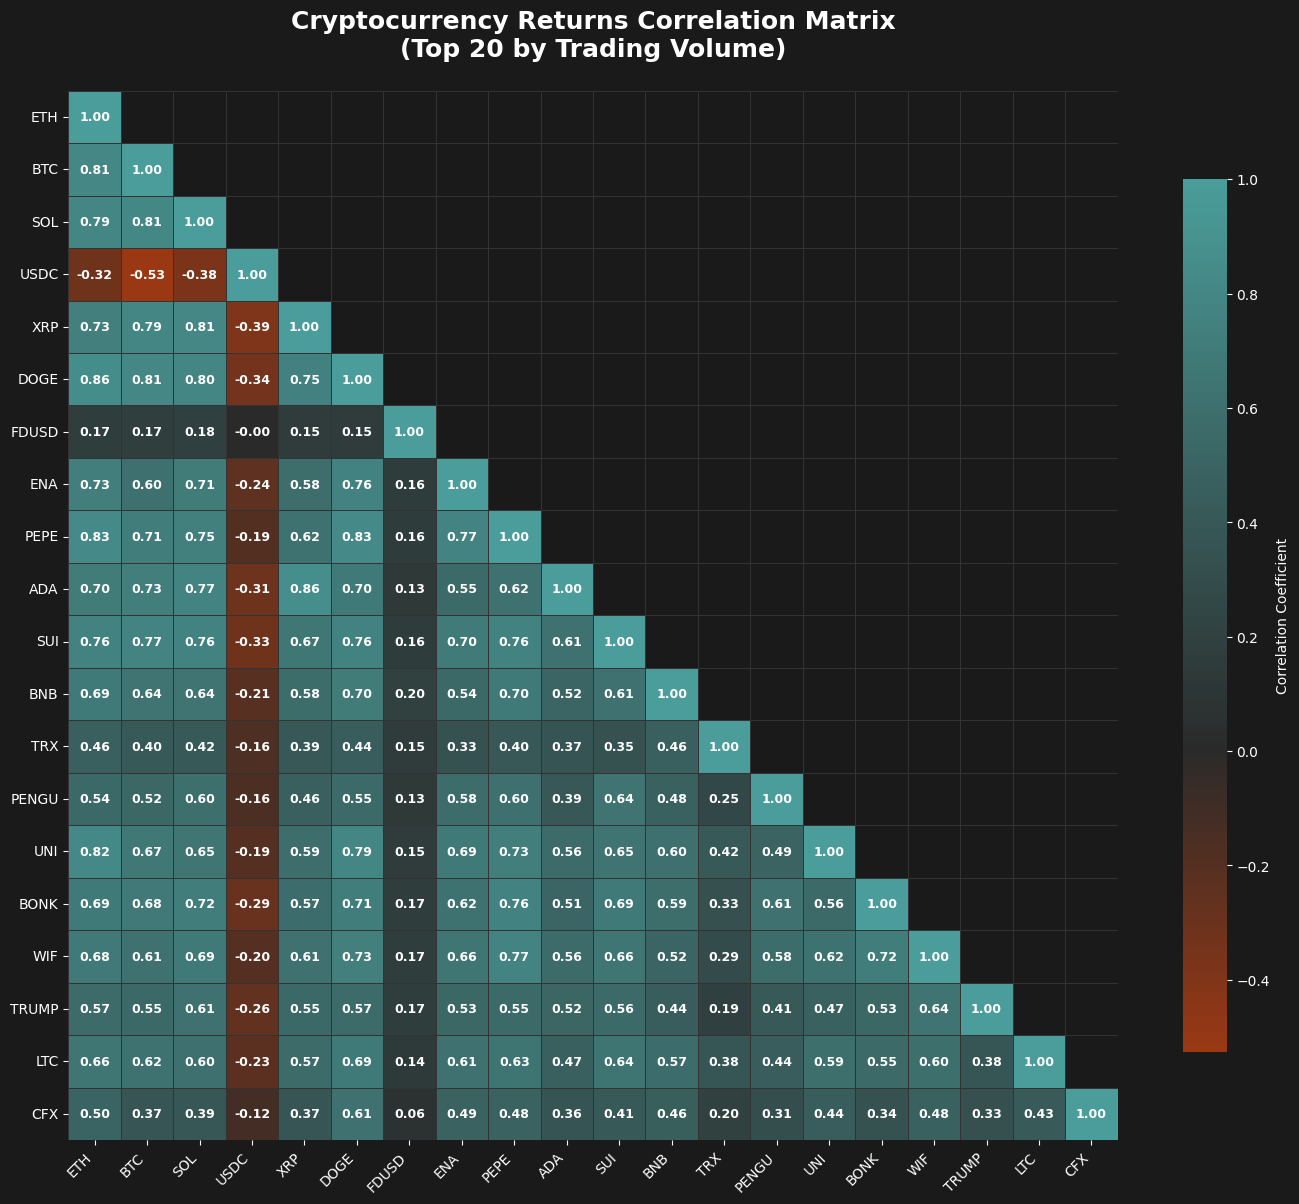

In [8]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 12))
fig.patch.set_facecolor('#1a1a1a')
ax.set_facecolor('#1a1a1a')

colors = ['#FF4500', '#2a2a2a', '#4A9D9A']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap=cmap,
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            linecolor='#333333',
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            annot_kws={'size': 9, 'color': 'white', 'weight': 'bold'})

plt.title('Cryptocurrency Returns Correlation Matrix\n(Top 20 by Trading Volume)',
          fontsize=18, fontweight='bold', pad=25, color='white')
plt.xticks(rotation=45, ha='right', color='white', fontsize=10)
plt.yticks(rotation=0, color='white', fontsize=10)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(colors='white')
cbar.ax.yaxis.label.set_color('white')

plt.tight_layout()
plt.show()